In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import os

In [ ]:
#import required libraries for CNN build
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv1D,MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam as adam
from sklearn import model_selection
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# specifying the path to csv files
'''
It is very important that this path is pointing to where the data is located otherwise this notebook will not run properly
if problems are encountered run os.getcwd to check current directory then change with os.chdir to the directory in where the files are stored
Also note the name of the files on the cell below this it is important those names match the file names of the files being used
After these 3 steps are done just run the cells in order and watch the magic happen
'''

os.chdir('/content/gdrive/MyDrive/AI_project/')


In [ ]:
# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
df = pd.read_excel('wavenumber.xlsx')
df1= pd.read_excel('grade1.xlsx')
df2= pd.read_excel('grade2.xlsx')
df3= pd.read_excel('grade3.xlsx')
df4= pd.read_excel('grade4.xlsx')
df5= pd.read_excel('normal.xlsx')

In [ ]:
df.columns=["wavenumber"]

df1.columns=["cell1g1","cell2g1","cell3g1","cell4g1","cell5g1","cell6g1","cell7g1"]

df2.columns=["cell1g2",
"cell2g2",
"cell3g2",
"cell4g2",
"cell5g2",
"cell6g2",
"cell7g2",
"cell8g2",
"cell9g2",
"cell10g2",
"cell11g2",
"cell12g2",
"cell13g2",
"cell14g2",
"cell15g2",
"cell16g2",
"cell17g2",
"cell18g2",
"cell19g2",
"cell20g2",
"cell21g2",
"cell22g2",
"cell23g2",
"cell24g2",
"cell25g2",
"cell26g2",
"cell27g2",
"cell28g2",
"cell29g2",
"cell30g2",
"cell31g2",
"cell32g2",
"cell33g2",
"cell34g2",
"cell35g2",
"cell36g2",
"cell37g2",
"cell38g2",
"cell39g2",
"cell40g2",
"cell41g2",
"cell42g2",
"cell43g2",
"cell44g2",
"cell45g2",
"cell46g2",
"cell47g2",
"cell48g2",
"cell49g2",
"cell50g2",
"cell51g2",
"cell52g2",
"cell53g2",
"cell54g2",
"cell55g2",
"cell56g2",
"cell57g2",
"cell58g2",
"cell59g2",
"cell60g2",
"cell61g2",
"cell62g2",
"cell63g2",
"cell64g2",
"cell65g2",
"cell66g2",
"cell67g2",
"cell68g2",
"cell69g2",
"cell70g2",
"cell71g2",
"cell72g2",
"cell73g2",
"cell74g2",
"cell75g2"]

df3.columns=["cell1g3",
"cell2g3",
"cell3g3",
"cell4g3",
"cell5g3",
"cell6g3",
"cell7g3",
"cell8g3",
"cell9g3",
"cell10g3",
"cell11g3",
"cell12g3",
"cell13g3",
"cell14g3",
"cell15g3",
"cell16g3",
"cell17g3",
"cell18g3",
"cell19g3",
"cell20g3",
"cell21g3",
"cell22g3",
"cell23g3",
"cell24g3",
"cell25g3",
"cell26g3",
"cell27g3",
"cell28g3",
"cell29g3",
"cell30g3",
"cell31g3",
"cell32g3",
"cell33g3",
"cell34g3",
"cell35g3",
"cell36g3",
"cell37g3",
"cell38g3",
"cell39g3",
"cell40g3",
"cell41g3",
"cell42g3",
"cell43g3",
"cell44g3"]

df4.columns=["cell1g4",
"cell2g4",
"cell3g4",
"cell4g4",
"cell5g4",
"cell6g4",
"cell7g4",
"cell8g4",
"cell9g4",
"cell10g4",
"cell11g4",
"cell12g4",
"cell13g4",
"cell14g4",
"cell15g4",
"cell16g4",
"cell17g4",
"cell18g4",
"cell19g4",
"cell20g4",
"cell21g4",
"cell22g4",
"cell23g4",
"cell24g4",
"cell25g4",
"cell26g4",
"cell27g4",
"cell28g4",
"cell29g4",
"cell30g4",
"cell31g4",
"cell32g4",
"cell33g4",
"cell34g4",
"cell35g4",
"cell36g4",
"cell37g4",
"cell38g4",
"cell39g4",
"cell40g4",
"cell41g4",
"cell42g4",
"cell43g4",
"cell44g4",
"cell45g4",
"cell46g4",
"cell47g4",
"cell48g4",
"cell49g4",
"cell50g4",
"cell51g4",
"cell52g4",
"cell53g4",
"cell54g4",
"cell55g4",
"cell56g4",
"cell57g4",
"cell58g4",
"cell59g4",
"cell60g4",
"cell61g4",
"cell62g4",
"cell63g4",
"cell64g4",
"cell65g4",
"cell66g4",
"cell67g4",
"cell68g4",
"cell69g4",
"cell70g4",
"cell71g4",
"cell72g4",
"cell73g4",
"cell74g4",
"cell75g4",
"cell76g4",
"cell77g4",
"cell78g4",
"cell79g4",
"cell80g4",
"cell81g4",
"cell82g4",
"cell83g4",
"cell84g4",
"cell85g4",
"cell86g4",
"cell87g4",
"cell88g4"]

df5.columns=["cell1norm",
"cell2norm",
"cell3norm",
"cell4norm",
"cell5norm",
"cell6norm",
"cell7norm",
"cell8norm",
"cell9norm",
"cell10norm",
"cell11norm",
"cell12norm",
"cell13norm",
"cell14norm",
"cell15norm",
"cell16norm",
"cell17norm",
"cell18norm",
"cell19norm",
"cell20norm",
"cell21norm",
"cell22norm",
"cell23norm",
"cell24norm",
"cell25norm",
"cell26norm",
"cell27norm"]


In [ ]:
#for i in range(1,len(.columns)+1):
 # x='"'+"cell"+str(i)+"norm"+'"'+','
  #print(x)

In [ ]:
uResult = pd.concat([df, df1,df2,df3,df4,df5], axis=1)
uResult

,wavenumber,cell1g1,cell2g1,cell3g1,cell4g1,cell5g1,cell6g1,cell7g1,cell1g2,cell2g2,...,cell18norm,cell19norm,cell20norm,cell21norm,cell22norm,cell23norm,cell24norm,cell25norm,cell26norm,cell27norm
0,201.433,2.220446e-16,2.220446e-16,2.220446e-16,6.716886e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,202.866,2.220446e-16,2.220446e-16,2.220446e-16,5.063976e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,204.299,5.392493e+00,1.558685e+01,1.584491e+00,3.511729e+01,2.220446e-16,7.869534e+00,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,205.732,1.250005e+01,2.568106e+01,1.445710e+00,1.903259e+01,9.455031e-01,2.027949e+01,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,24.192382,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,207.164,1.724569e+01,2.817929e+01,9.325067e-02,2.722214e+00,1.576463e+01,3.057998e+01,2.220446e-16,2.120995e+01,1.230474e+01,...,0.0,0.000000,0.000000,43.954666,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,3994.270,2.220446e-16,2.220446e-16,1.369729e+01,2.220446e-16,4.312363e+01,2.220446e-16,7.666778e+00,2.220446e-16,4.729692e+01,...,0.0,52.277408,58.391746,0.000000,66.127897,71.552720,1288.743810,0.0,17.747151,0.0
2648,3995.700,2.220446e-16,2.220446e-16,1.300243e+00,2.220446e-16,1.120874e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.814075e+01,...,0.0,94.567413,100.557858,0.000000,51.037478,56.336547,1307.801459,0.0,0.000000,0.0
2649,3997.130,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,1.763127e+00,2.220446e-16,2.220446e-16,6.109669e+00,...,0.0,119.024285,124.881601,5.990443,29.309183,34.480145,1327.464875,0.0,0.000000,0.0
2650,3998.570,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,9.877087e+00,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,145.354658,151.073187,15.716297,7.052382,12.094009,1353.204388,0.0,0.000000,0.0


In [ ]:
tResult = uResult.transpose()
tResult
new_header = tResult.iloc[0] #grab the first row for the header
tResult = tResult[1:] #take the data less the header row
tResult.columns = new_header #set the header row as the df header

tResult.iloc[1,2].dtype


dtype('float64')

In [ ]:
tResult.insert(0,'Class',np.zeros(241,float))
tResult


wavenumber,Class,201.433,202.866,204.299,205.732,207.164,208.597,210.03,211.463,212.896,...,3987.1,3988.54,3989.97,3991.4,3992.84,3994.27,3995.7,3997.13,3998.57,4000.0
cell1g1,0.0,2.220446e-16,2.220446e-16,5.392493e+00,12.500053,17.245687,2.013058e+01,2.148156e+01,2.060336e+01,1.627879e+01,...,31.881182,19.485975,2.709081,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell2g1,0.0,2.220446e-16,2.220446e-16,1.558685e+01,25.681065,28.179293,2.411621e+01,1.671858e+01,9.256451e+00,3.436716e+00,...,113.922676,81.920840,47.283899,1.766350e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell3g1,0.0,2.220446e-16,2.220446e-16,1.584491e+00,1.445710,0.093251,2.220446e-16,1.049639e+00,5.172544e+00,1.062824e+01,...,62.966740,56.730609,44.781357,3.260543e+01,2.283625e+01,1.369729e+01,1.300243e+00,2.220446e-16,2.220446e-16,2.220446e-16
cell4g1,0.0,6.716886e+01,5.063976e+01,3.511729e+01,19.032591,2.722214,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,129.531757,107.886559,79.656685,4.484552e+01,7.636676e+00,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell5g1,0.0,2.220446e-16,2.220446e-16,2.220446e-16,0.945503,15.764627,3.136114e+01,4.986941e+01,7.148169e+01,9.248158e+01,...,120.733707,116.157134,108.178262,9.374254e+01,7.149034e+01,4.312363e+01,1.120874e+01,2.220446e-16,2.220446e-16,2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell23norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.413202e+00,1.979072e+00,0.000000e+00,5.420899e+00,...,10.495779,41.492552,60.722168,7.033863e+01,7.800802e+01,7.155272e+01,5.633655e+01,3.448014e+01,1.209401e+01,0.000000e+00
cell24norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.971605e+01,3.864470e+01,4.595974e+01,4.232914e+01,...,1282.686163,1288.546736,1279.409131,1.260444e+03,1.260894e+03,1.288744e+03,1.307801e+03,1.327465e+03,1.353204e+03,1.378973e+03
cell25norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,27.005510,20.376533,6.264849,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cell26norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.576528e+01,4.995726e+01,8.051201e+01,...,19.427950,2.050947,0.000000,0.000000e+00,9.555046e+00,1.774715e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
for i in range(len(tResult.index)):
  if tResult.index[i][-1] == '1':
    tResult.iloc[i,0] = 1
  elif tResult.index[i][-1] == '2':
    tResult.iloc[i,0] = 1
  elif tResult.index[i][-1] == '3':
    tResult.iloc[i,0] = 1
  elif tResult.index[i][-1] == '4':
    tResult.iloc[i,0] = 1
  else:
    tResult.iloc[i,0] = 0
tResult.sample(50)



wavenumber,Class,201.433,202.866,204.299,205.732,207.164,208.597,210.03,211.463,212.896,...,3987.1,3988.54,3989.97,3991.4,3992.84,3994.27,3995.7,3997.13,3998.57,4000.0
cell43g4,1.0,2.087092e+01,2.299437e+01,2.786311e+01,3.360927e+01,2.633050e+01,1.016269e+01,2.220446e-16,2.220446e-16,2.220446e-16,...,9.292267,1.132416e+01,1.230420e+01,4.714883e+00,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,8.004548e-01,4.487266e+00
cell21norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.419238e+01,4.395467e+01,4.320251e+01,4.470843e+01,6.961814e+01,1.104674e+02,...,0.000000,4.564788e+00,9.576026e+00,7.568640e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.990443e+00,1.571630e+01,2.574826e+01
cell13g2,1.0,2.220446e-16,2.220446e-16,3.250199e+00,4.211641e+00,3.687182e+00,6.985565e+00,1.367879e+01,2.052508e+01,2.830255e+01,...,10.796541,2.737212e+01,2.789799e+01,8.889518e+00,2.220446e-16,2.220446e-16,1.232442e+01,2.465288e+00,2.220446e-16,2.220446e-16
cell19norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.510646e+01,...,25.508253,5.941250e+01,3.835409e+01,3.344337e+01,2.756566e+01,5.227741e+01,9.456741e+01,1.190243e+02,1.453547e+02,1.703788e+02
cell87g4,1.0,2.220446e-16,2.220446e-16,8.051604e+00,1.062570e+02,1.516575e+02,1.615414e+02,1.405161e+02,1.406591e+02,1.655795e+02,...,349.183375,3.739751e+02,3.385457e+02,2.555242e+02,1.711462e+02,1.116703e+02,7.394757e+01,9.538886e+00,2.220446e-16,2.220446e-16
cell23g3,1.0,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,1.000322e+01,2.078655e+01,3.652587e+01,4.915363e+01,...,95.511238,8.888885e+01,6.498976e+01,2.914629e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell8g3,1.0,5.945269e+00,1.080088e+00,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,8.191567e+00,1.798464e+01,2.140764e+01,...,91.372696,1.068107e+02,1.100616e+02,8.444398e+01,4.870338e+01,2.441968e+01,1.556317e+00,2.220446e-16,2.220446e-16,2.220446e-16
cell14norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.661280e+00,4.535014e+01,5.396678e+01,4.724947e+01,...,50.942407,3.434928e+01,2.493206e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cell50g4,1.0,1.253687e+01,2.970193e+01,4.117248e+01,1.833999e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,6.664560e+00,...,48.597802,3.618244e+01,3.439424e+01,5.329497e+01,6.462532e+01,4.918816e+01,2.515974e+01,2.220446e-16,2.220446e-16,2.220446e-16
cell25g3,1.0,2.220446e-16,6.148819e-01,8.054165e+00,1.307500e+01,2.007905e+01,3.319536e+01,4.268437e+01,4.202806e+01,2.667693e+01,...,327.020579,3.003996e+02,2.455662e+02,1.693824e+02,1.158078e+02,1.017716e+02,9.323330e+01,4.044839e+01,2.220446e-16,2.220446e-16


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
#test train split section - sklearn k-fold crossvalidation
X = tResult.drop("Class",1)
y = tResult["Class"]

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="all")
X, y = rus.fit_resample(X,y)

X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.70,random_state =1,stratify = y) #, ,shuffle=True
y_train.value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


1.0    8
0.0    8
Name: Class, dtype: int64

In [ ]:
#Initializing CNN and a conv layer
n_timesteps = 2652
n_features = 1 
n_classes = 5  # or 2 depending on what we want to classify
'''n_timesteps = number of features and n_features = input because we are coverting tabuler data into
timeseries-ish data'''

model=Sequential()
model.add(Input(shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=16,kernel_size=2141,padding="same",activation="leaky_relu"))  #needs adjustments #output = 512,16
model.add(Conv1D(filters=32,kernel_size=257,padding="same",activation="leaky_relu")) # output = 256,32
#Pooling Operation
model.add(MaxPool1D(pool_size=2,strides=2)) #output  = 128,32

# 2 Convolutional layers 
model.add(Conv1D(filters=64,kernel_size=65,padding="same",activation ="leaky_relu")) #output = 64,64
model.add(Conv1D(filters=64,kernel_size=33,padding="same",activation ="leaky_relu")) #output = 32,64
model.add(MaxPool1D(pool_size=2,strides=2)) #output = 16,64

model.add(Conv1D(filters=32,kernel_size=9,padding="same",activation="leaky_relu")) #output = 8,32
model.add(Conv1D(filters=64,kernel_size=5,padding="same",activation="leaky_relu")) #output = 4,64
#model.add(MaxPool1D(pool_size=2,strides=2)) #output = 2,64

#Flattening operation 
model.add(Flatten()) #vector size = 64*4

#Full Connected Layer and Output Layer
model.add(Dense(256,activation="leaky_relu")) # Fully Connected
model.add(Dense(128,activation="leaky_relu")) #another FC layer
model.add(Dense(1,activation="sigmoid")) #output

In [ ]:
#fit model
from tensorflow.keras import optimizers
opt=  optimizers.RMSprop(1e-4)  #adam(learning_rate=1e-8) #
batch_size = 1
model.compile(optimizer=opt,loss='mse',metrics=['accuracy',"mae"])
model.fit(X_train,y_train,epochs=40 ,validation_split=0.70) # steps_per_epoch=len(X_train)/batch_size, validation_steps=len(y_train)/batch_size, batch_size=1 

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.2438 - accuracy: 0.7500 - mae: 0.4937 - val_loss: 0.4422 - val_accuracy: 0.4167 - val_mae: 0.5228
Epoch 2/40
1/1 [==============================] - 0s 71ms/step - loss: 0.2112 - accuracy: 0.7500 - mae: 0.2438 - val_loss: 0.2237 - val_accuracy: 0.6667 - val_mae: 0.4706
Epoch 3/40
1/1 [==============================] - 0s 77ms/step - loss: 0.2334 - accuracy: 0.5000 - mae: 0.4816 - val_loss: 0.3107 - val_accuracy: 0.4167 - val_mae: 0.5018
Epoch 4/40
1/1 [==============================] - 0s 68ms/step - loss: 0.0668 - accuracy: 1.0000 - mae: 0.2449 - val_loss: 0.2878 - val_accuracy: 0.5833 - val_mae: 0.3822
Epoch 5/40
1/1 [==============================] - 0s 69ms/step - loss: 5.0604e-06 - accuracy: 1.0000 - mae: 0.0016 - val_loss: 0.2880 - val_accuracy: 0.5833 - val_mae: 0.3822
Epoch 6/40
1/1 [==============================] - 0s 64ms/step - loss: 4.8693e-06 - accuracy: 1.0000 - mae: 0.0016 - val_loss: 0.2881 - val_acc

In [ ]:
pred = model.predict(X_test,verbose=True)
pred

2/2 [==============================] - 0s 15ms/step


array([[9.99986887e-01],
       [9.99983907e-01],
       [9.94787455e-01],
       [9.99987245e-01],
       [9.99999642e-01],
       [9.99996424e-01],
       [4.38834876e-02],
       [9.98973846e-01],
       [8.67150724e-01],
       [9.99759614e-01],
       [9.99921322e-01],
       [9.99871492e-01],
       [9.99994874e-01],
       [1.46348830e-02],
       [8.97099495e-01],
       [1.16844225e-04],
       [9.92701888e-01],
       [9.99993563e-01],
       [9.99925613e-01],
       [7.01441705e-01],
       [9.54199672e-01],
       [9.97989297e-01],
       [9.99008000e-01],
       [9.99576628e-01],
       [9.99949932e-01],
       [8.67349207e-01],
       [1.81695238e-01],
       [9.99997497e-01],
       [9.96418595e-01],
       [9.98485029e-01],
       [9.99991059e-01],
       [9.99640226e-01],
       [9.99961138e-01],
       [9.99999404e-01],
       [9.99805391e-01],
       [2.19085306e-01],
       [3.68460105e-03],
       [3.41168961e-05]], dtype=float32)

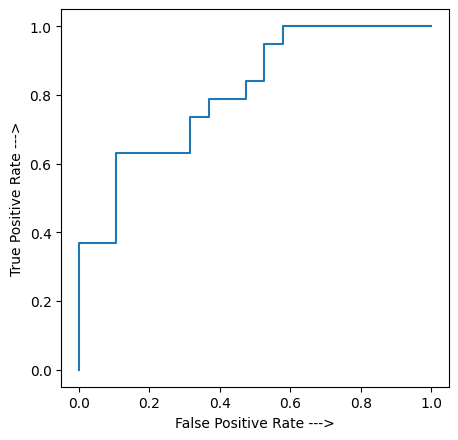

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix,roc_curve, auc
conf = confusion_matrix(y_test,pred.round())
report = classification_report(y_test,pred.round())
#f1 = f1_score(y_test,pred.round)
#f1
fpr, tpr, threshold = roc_curve(y_test,pred,)

auc = auc(fpr,tpr)
curve = roc_curve(y_test,pred)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr,tpr,linestyle='-', label='ROC (auc =%0.3f)'% auc)

plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')

plt.show()

In [ ]:
print(conf)

[[ 7 12]
 [ 0 19]]


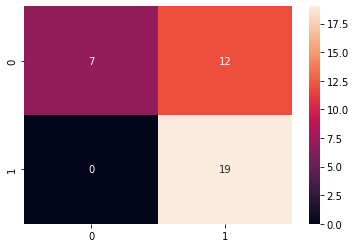

In [ ]:
import seaborn as snNew
import matplotlib.pyplot as pltNew

d_cm = pd.DataFrame(conf, range(2), range(2))
snNew.heatmap(d_cm, annot=True)
pltNew.show()

In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54        19
         1.0       0.61      1.00      0.76        19

    accuracy                           0.68        38
   macro avg       0.81      0.68      0.65        38
weighted avg       0.81      0.68      0.65        38

